<a href="https://colab.research.google.com/github/Srishti6125/MNIST-Number-Classification/blob/main/MNIST_number_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Loading MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

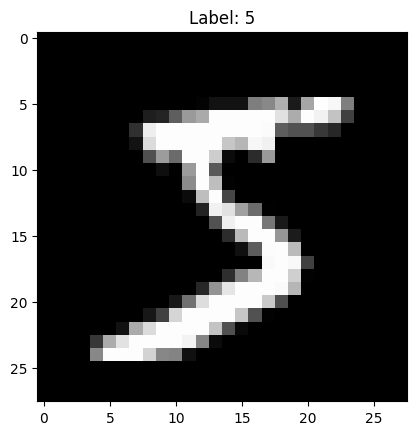

In [3]:
# Simple visualization
plt.imshow(x_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()

### MLP (Multi-Layer Pereceptron)

In [4]:
# Normalizing pixels (0–255 → 0–1)
x_train_mlp = x_train / 255.0
x_test_mlp = x_test / 255.0

In [5]:
# building model
mlp_model = Sequential([
    Flatten(input_shape=(28, 28)),  # convert 28x28 → 784
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # 10 classes (0–9 digits)
])
mlp_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
mlp_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# adding earlystopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [7]:
# Training model
history = mlp_model.fit(
    x_train_mlp, y_train,
    epochs=20,
    validation_split=0.1,
    callbacks=[early_stop]
)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8193 - loss: 0.5967 - val_accuracy: 0.9652 - val_loss: 0.1149
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9465 - loss: 0.1756 - val_accuracy: 0.9715 - val_loss: 0.0899
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9609 - loss: 0.1279 - val_accuracy: 0.9763 - val_loss: 0.0804
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9673 - loss: 0.1055 - val_accuracy: 0.9767 - val_loss: 0.0755
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9725 - loss: 0.0904 - val_accuracy: 0.9793 - val_loss: 0.0730
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9744 - loss: 0.0780 - val_accuracy: 0.9792 - val_loss: 0.0691
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9763 - loss: 0.0767 - val_accuracy: 0.9802 - val_loss: 0.0762
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9787 - loss: 0.0666 -

In [8]:
# Evaluating model
train_loss, train_acc = mlp_model.evaluate(x_train_mlp, y_train)
print(f"\nTrain Accuracy: {train_acc:.4f}")
test_loss, test_acc = mlp_model.evaluate(x_test_mlp, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9896 - loss: 0.0352

Train Accuracy: 0.9883
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.0884

Test Accuracy: 0.9775


In [9]:
# Predicting result
predictions = mlp_model.predict(x_test_mlp)
pred_labels = predictions.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 800x800 with 0 Axes>

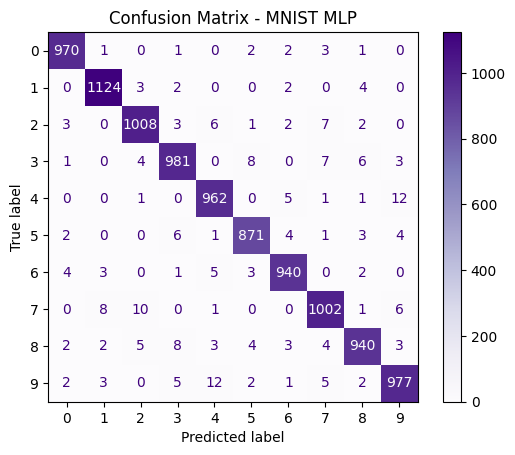

In [10]:
# Building Confusion Matrix
cm = confusion_matrix(y_test, pred_labels )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

plt.figure(figsize=(8, 8))
disp.plot(cmap="Purples", values_format="d")
plt.title("Confusion Matrix - MNIST MLP")
plt.show()

In [11]:
# Prediction on first 10 images
print("Predicted labels:", pred_labels[:10])
print("True labels     :", y_test[:10])

Predicted labels: [7 2 1 0 4 1 4 9 5 9]
True labels     : [7 2 1 0 4 1 4 9 5 9]



Total misclassified: 225



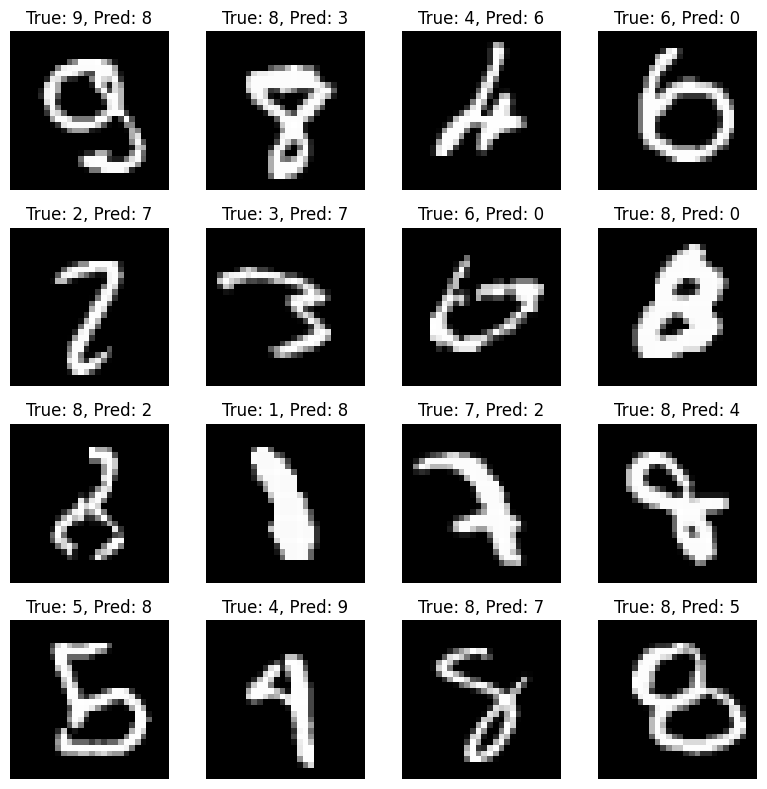

In [12]:
# visualizing misclassified Images

# Finding misclassified indices
mis_idx = np.where(pred_labels != y_test)[0]
print(f"\nTotal misclassified: {len(mis_idx)}\n")

# Show first 16 misclassified images
num_show = 16
plt.figure(figsize=(8, 8))
for i, idx in enumerate(mis_idx[:num_show]):
    plt.subplot(4, 4, i + 1)
    img = x_test_mlp[idx].reshape(28, 28)  # since shape is (28,28,1)
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {y_test[idx]}, Pred: {pred_labels[idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

MLPs naturally overfit on image datasets like MNIST because they ignore spatial patterns and rely on a large number of parameters. Even with dropout and early stopping, a small generalization gap is normal. CNNs are the correct architecture for image classification and significantly reduce overfitting while improving accuracy.

### CNN (Convulational Neural Network)

In [13]:
# reshapping pixls
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [14]:
# building model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),   # 32 features, 3x3 kernel, input-28×28 greyscale image
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),       # 64 features, 3x3 kernel
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Early Stopping Callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [16]:
# Training model
history = cnn_model.fit(
    x_train_cnn, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop]
)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8812 - loss: 0.3785 - val_accuracy: 0.9865 - val_loss: 0.0449
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9800 - loss: 0.0653 - val_accuracy: 0.9902 - val_loss: 0.0319
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9860 - loss: 0.0433 - val_accuracy: 0.9907 - val_loss: 0.0349
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9895 - loss: 0.0336 - val_accuracy: 0.9908 - val_loss: 0.0334
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9913 - loss: 0.0265 - val_accuracy: 0.9913 - val_loss: 0.0325


In [17]:
# Evaluating model
train_loss, train_acc = cnn_model.evaluate(x_train_cnn, y_train)
print(f"\nTrain Accuracy: {train_acc:.4f}")
test_loss, test_acc = cnn_model.evaluate(x_test_cnn, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9925 - loss: 0.0250

Train Accuracy: 0.9918
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9871 - loss: 0.0371

Test Accuracy: 0.9889


In [18]:
# Predicting result
predictions = cnn_model.predict(x_test_cnn)
pred_labels = predictions.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 800x800 with 0 Axes>

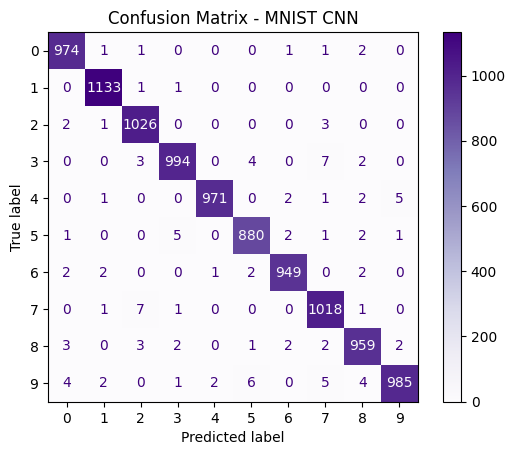

In [19]:
# Building Confusion Matrix
cm = confusion_matrix(y_test, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

plt.figure(figsize=(8, 8))
disp.plot(cmap="Purples", values_format="d")
plt.title("Confusion Matrix - MNIST CNN")
plt.show()

In [20]:
# Prediction on first 10 images

print("Predicted labels:", pred_labels[:10])
print("True labels     :", y_test[:10])

Predicted labels: [7 2 1 0 4 1 4 9 5 9]
True labels     : [7 2 1 0 4 1 4 9 5 9]



Total misclassified: 111



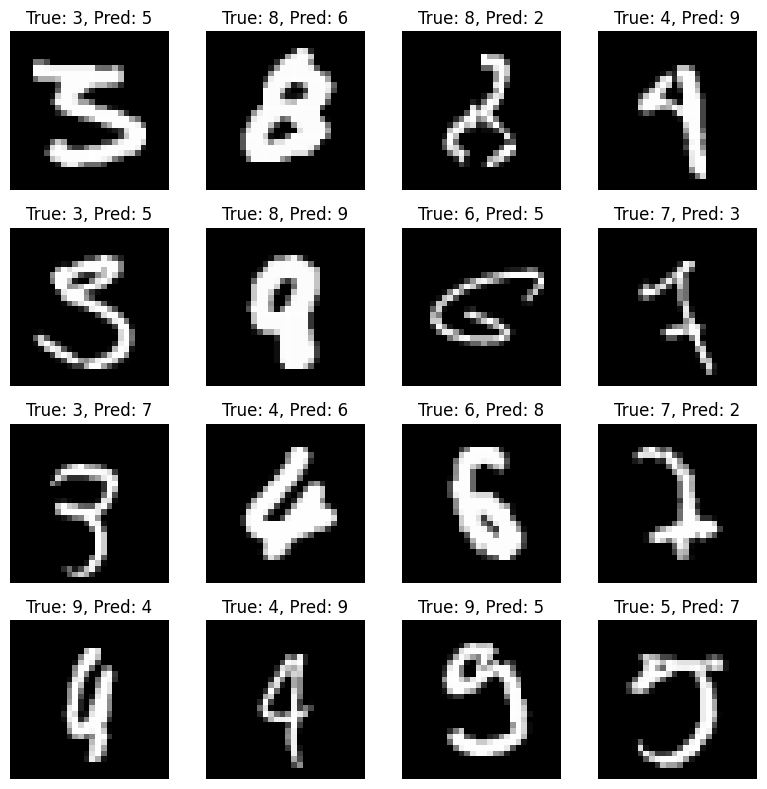

In [21]:
# visualizing misclassified Images

# Finding misclassified indices
mis_idx = np.where(pred_labels != y_test)[0]
print(f"\nTotal misclassified: {len(mis_idx)}\n")

# Show first 16 misclassified images
num_show = 16
plt.figure(figsize=(8,8))
for i, idx in enumerate(mis_idx[:num_show]):
    plt.subplot(4, 4, i + 1)
    img = x_test_cnn[idx].reshape(28, 28)  # since shape is (28,28,1)
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {y_test[idx]}, Pred: {pred_labels[idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

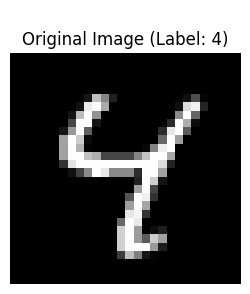


Visualizing layer: conv2d
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step

Number of filters in this layer: 32


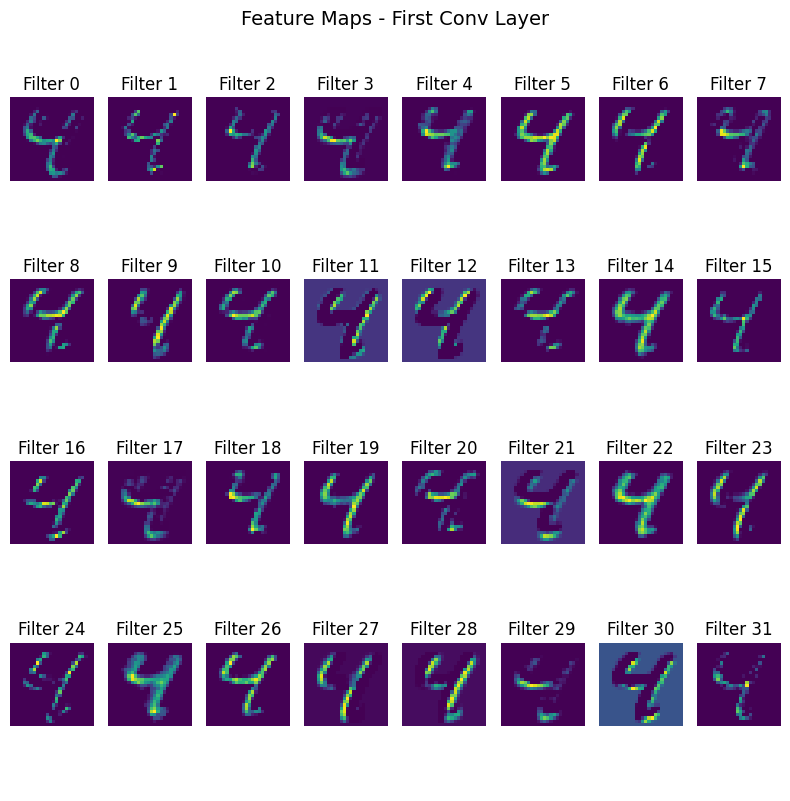

In [30]:
# Visualizing Feature Maps from the First Conv Layer

# Picking one sample image from the test set
idx = 6  # change index to visualize another test image
sample = x_test_cnn[idx:idx+1]  # shape: (1, 28, 28, 1)
plt.figure(figsize=(3,3))
plt.imshow(sample[0].reshape(28, 28), cmap="gray")
plt.title(f"\nOriginal Image (Label: {y_test[idx]})")
plt.axis("off")
plt.show()

#Take the first Conv2D layer from the trained CNN
conv_layer = cnn_model.layers[0]   # first Conv2D
print("\nVisualizing layer:", conv_layer.name)

# Build a NEW model that uses the SAME conv_layer
inputs = tf.keras.Input(shape=(28, 28, 1))
x = conv_layer(inputs)             # pass input through that conv layer
activation_model = tf.keras.Model(inputs=inputs, outputs=x)

# Get feature maps for the chosen sample
feature_maps = activation_model.predict(sample)   # shape: (1, h, w, channels)
feature_maps = feature_maps[0]                    # (h, w, channels)
num_filters = feature_maps.shape[-1]
print("\nNumber of filters in this layer:", num_filters)

# Show all 32 feature maps
num_show = 32
cols = 8
rows = num_show // cols
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Feature Maps - First Conv Layer",fontsize=14)
for i in range(num_show):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(feature_maps[:, :, i], cmap="viridis")
    plt.title(f"Filter {i}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [31]:
# downloading and saving cnn model

from google.colab import files
cnn_model.save("mnist_cnn.h5")
print("Model succesfully saved.")
files.download("mnist_cnn.h5")
print("Model succesfully downloaded.")

Model succesfully saved.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model succesfully downloaded.
